In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [60]:
! pip install statsmodels

# importing data 

In [2]:
loan_data=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv")
loan_data=loan_data.drop(['Unnamed: 0'],axis=1)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [3]:
test_data=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [4]:
print(loan_data.shape)
print(test_data.shape)


(491, 13)
(123, 12)


In [5]:
loan_data.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [6]:
# seeing as a percentage
loan_data.Loan_Status.value_counts(normalize=True)

1    0.698574
0    0.301426
Name: Loan_Status, dtype: float64

In [7]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Visualization 

## categorical variables nominal

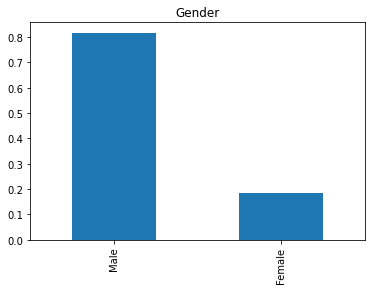

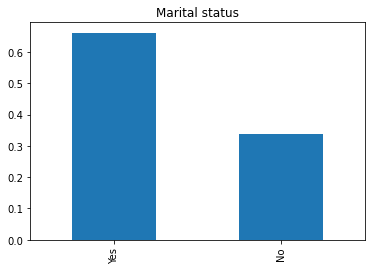

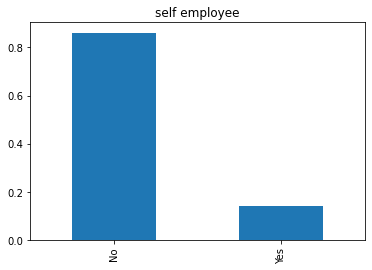

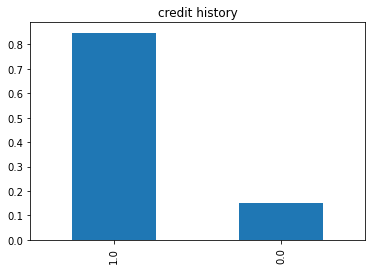

In [8]:
loan_data.Gender.value_counts(normalize=True).plot(kind='bar',title='Gender')
plt.show()
loan_data.Married.value_counts(normalize=True).plot(kind='bar',title='Marital status')
plt.show()
loan_data.Self_Employed.value_counts(normalize=True).plot(kind='bar',title='self employee')
plt.show()
loan_data.Credit_History.value_counts(normalize=True).plot(kind='bar',title='credit history')
plt.show()

Around 80 %  male\
Around 65% married\
Around 85 % self employed\ 
Around 85% has credit history\

## Ordrinal data

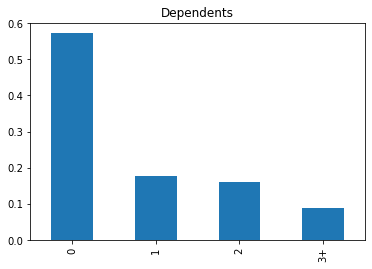

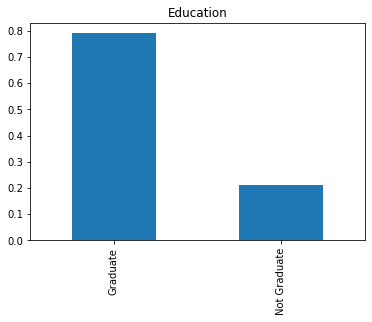

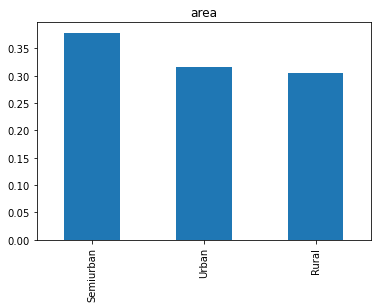

In [9]:
loan_data.Dependents.value_counts(normalize=True).plot(kind='bar',title='Dependents')
plt.show()
loan_data.Education.value_counts(normalize=True).plot(kind='bar',title='Education')
plt.show()
loan_data.Property_Area.value_counts(normalize=True).plot(kind='bar',title='area')
plt.show()

## Numerical variables

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


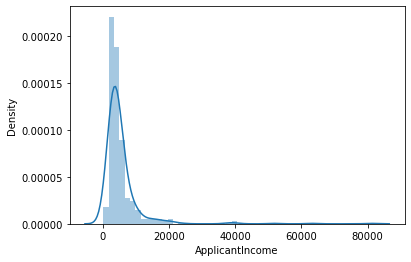

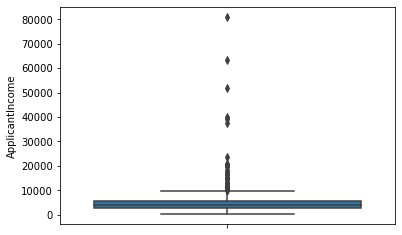

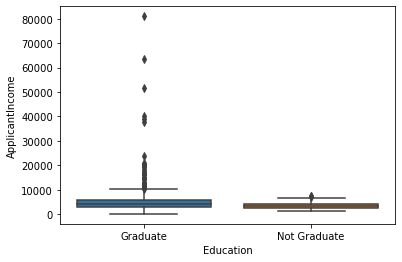

In [10]:
#Applicantincome
sns.distplot(loan_data['ApplicantIncome'])
plt.show()
sns.boxplot(y=loan_data['ApplicantIncome'])
plt.show()
sns.boxplot(y=loan_data['ApplicantIncome'],x=loan_data['Education'])
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


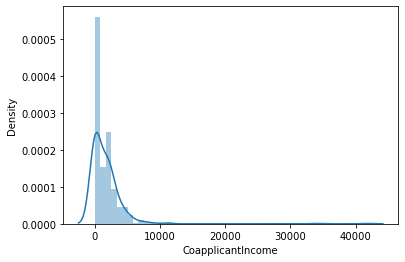

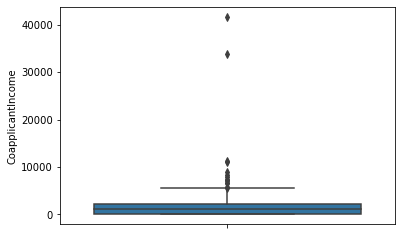

In [11]:
#Coapplicant income
sns.distplot(loan_data['CoapplicantIncome'])
plt.show()
sns.boxplot(y=loan_data['CoapplicantIncome'])
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the Coapplicant's income and it is not normally distributed.

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


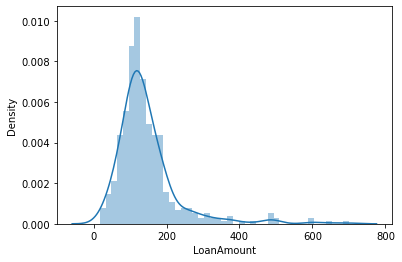

In [12]:
#loan Amount
sns.distplot(loan_data['LoanAmount'])
plt.show()


it is almost normally distributed

## Bivariate analysis






### Gender vs Loan status

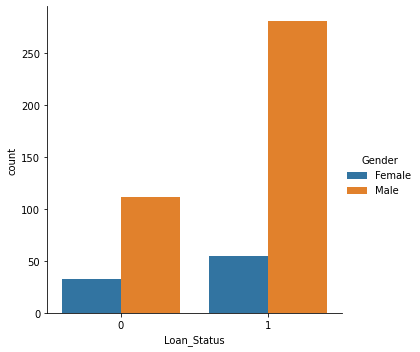

In [13]:
sns.catplot(x='Loan_Status',hue='Gender',data=loan_data,kind='count')

Loan_Status    0    1
Gender               
Female        33   55
Male         112  281


<AxesSubplot:xlabel='Gender'>

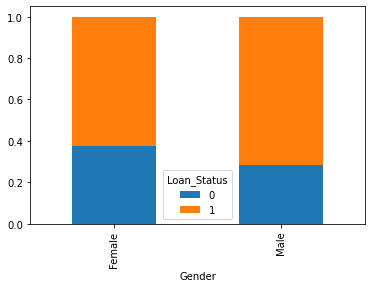

In [14]:
#using crosstab
Gender=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
print(Gender.head())
Gender.columns
Gender.div(Gender.sum(axis=1),axis=0).plot(kind='bar',stacked=True)

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

## Married vs loan_status 

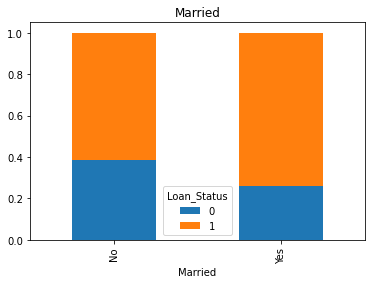

In [15]:
Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Married.div(Married.sum(axis=1),axis=0).plot(kind='bar',title='Married',stacked=True)
plt.show()

## Education vs Loan_status

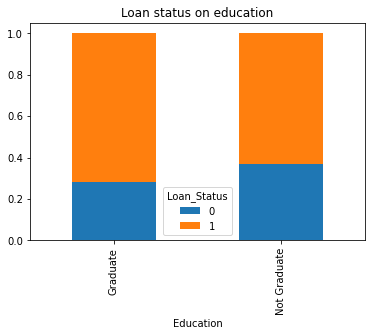

In [16]:
education=pd.crosstab(loan_data['Education'],loan_data['Loan_Status'])
education.div(education.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title='Loan status on education')
plt.show()

We can see that graduate person has a higher chance of getting a loan

## Property area vs loan status

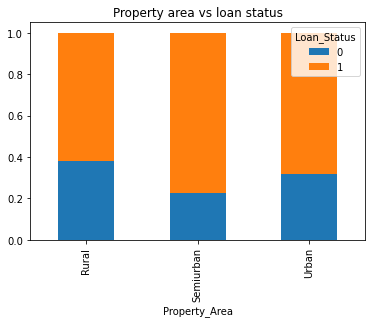

In [17]:
prty=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
prty.div(prty.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title='Property area vs loan status')
plt.show()

laons are getting approved from semi urbar area is more 

## Credit history vs loan status

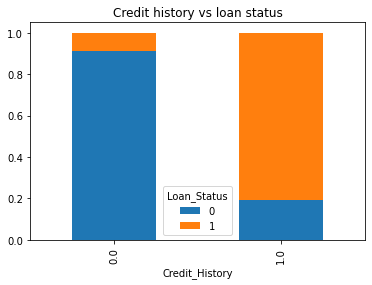

In [18]:
credit=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
credit.div(credit.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title='Credit history vs loan status')
plt.show()

people with credit history has a high chance to get a loan


## Applicant income vs loan status

81000
150


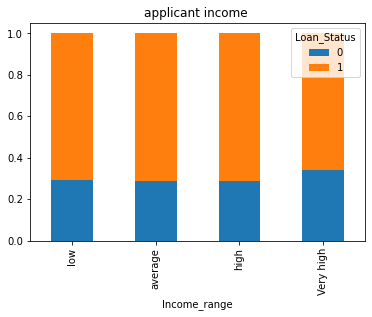

In [19]:
# diving the applicant income into bins line low avg high and very high 
#for that we need to know the max and min salary 
print(loan_data.ApplicantIncome.max())
print(loan_data.ApplicantIncome.min())
bins=[0,2500,4000,6000,81000]
grp=['low','average','high','Very high']
loan_data['Income_range']=pd.cut(loan_data['ApplicantIncome'],bins,labels=grp)
income_range=pd.crosstab(loan_data['Income_range'],loan_data['Loan_Status'])
income_range.div(income_range.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title="applicant income ")
plt.show()

loan approved almost same for every category of the applicant income 

## total income (applicant income + coapplicant ) vs loan status 

1442.0
81000.0


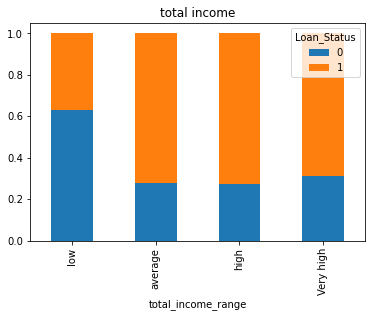

In [20]:
loan_data['total_income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
print(loan_data.total_income.min())
print(loan_data.total_income.max())
bins=[0,2500,4000,6000,81000]
grp=['low','average','high','Very high']
loan_data['total_income_range']=pd.cut(loan_data['total_income'],bins=bins,labels=grp)
total_income_rnage=pd.crosstab(loan_data['total_income_range'],loan_data['Loan_Status'])
total_income_rnage.div(total_income_rnage.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title="total income")
plt.show()

we can see that portion of loan getting approved for person having low total income is very less

## loan amount vs Loan status

17.0
700.0


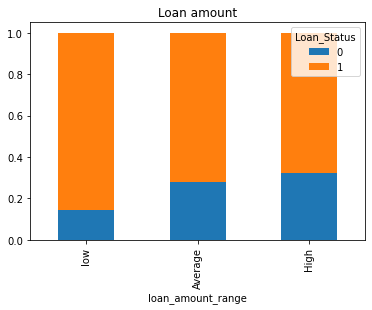

In [21]:
print(loan_data.LoanAmount.min())
print(loan_data.LoanAmount.max())
bins=[0,50,150,700]
grp=['low','Average','High']
loan_data['loan_amount_range']=pd.cut(loan_data['LoanAmount'],bins=bins,labels=grp)
Loan_amount=pd.crosstab(loan_data['loan_amount_range'],loan_data['Loan_Status'])
Loan_amount.div(Loan_amount.sum(axis=1),axis=0).plot(kind='bar',stacked=True,title='Loan amount')
plt.show()

loans are approved more for low loan amount and less approved for high loan amaount

## Dependend vs Loan Status

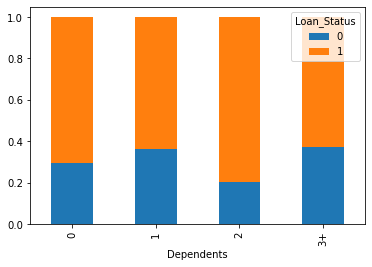

In [22]:
dep=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
dep.div(dep.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()

We can not say loan status of a person depending upon his dependents 

In [23]:
# Dropping the bins that are created 
loan_data=loan_data.drop(['Income_range','total_income','total_income_range','loan_amount_range'],axis=1)


<AxesSubplot:>

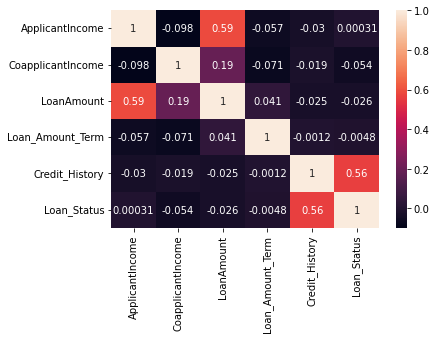

In [24]:
sns.heatmap(loan_data.corr(),annot=True)

## Working with null values

In [25]:
# finding how many null values in every columns 
loan_data.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# Replacing null vlues using mode , median or mean
loan_data['Gender']=loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married']=loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [27]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

We can see most value is 360 so we replce 360 with null value 

In [28]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(),inplace=True)

In [29]:
loan_data['LoanAmount'].value_counts()

120.0    17
110.0    13
100.0    13
113.0    11
160.0    11
         ..
436.0     1
259.0     1
296.0     1
320.0     1
178.0     1
Name: LoanAmount, Length: 176, dtype: int64

In [30]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)

In [31]:
# Now checking for null values 
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
test_data.isnull().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

test data also has null values so replace the null values in test data as done in train data

In [33]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

In [34]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Removing outliers 

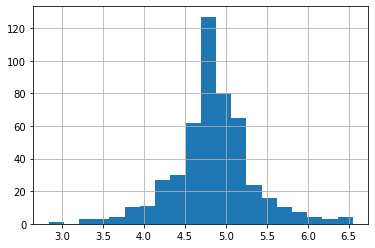

In [35]:
#log transformation for removing the rigtht skewness 
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

## Model Building 

In [36]:
loan_data=loan_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

In [37]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1,4.744932
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1,4.867534
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0,4.700480
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1,4.564348
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1,5.438079
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1,5.204007
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1,4.718499
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1,5.220356
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0,4.499810


In [38]:
X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status

In [39]:
train = loan_data.copy()
test = test_data.copy()


In [40]:
#Dropping Gender and dependents as loan status not depend on them 
# Dropping Loan amount as we have taken the log of loan amaount 

X.drop(['LoanAmount'],axis=1,inplace=True)
test.drop(['LoanAmount'],axis=1,inplace=True)

In [41]:
X['Total Income']=X['ApplicantIncome']+X['CoapplicantIncome']
test['Total Income']=test['ApplicantIncome']+test['CoapplicantIncome']

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


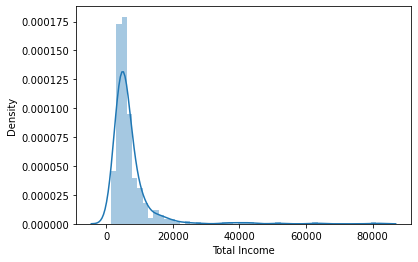

In [42]:
sns.distplot(X['Total Income'])
plt.show()

It is not normal taking the log to make it normal distribution 

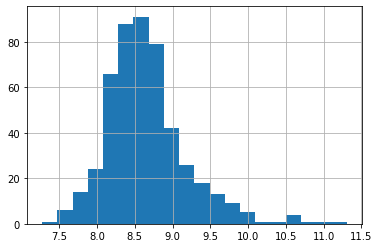

In [43]:
X['Log_total_income']=np.log(X['Total Income'])
X['Log_total_income'].hist(bins=20)
test['Log_total_income']=np.log(test['Total Income'])
plt.show()

In [44]:
X.drop('Total Income',axis=1,inplace=True)
test.drop('Total Income',axis=1,inplace=True)

In [45]:
X.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [46]:
X=pd.get_dummies(X,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [47]:
X.head()

,Loan_Amount_Term,Credit_History,LoanAmount_log,Log_total_income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,4.744932,8.422223,0,0,0,0,0,0,0,1,0
1,360.0,1.0,4.867534,8.648748,1,1,0,0,1,1,1,0,0
2,360.0,1.0,4.700480,8.822322,0,1,0,0,0,0,0,0,1
3,360.0,1.0,4.564348,8.454253,1,1,0,0,0,1,1,0,1
4,300.0,1.0,5.438079,9.041922,1,1,0,1,0,0,0,1,0


<AxesSubplot:>

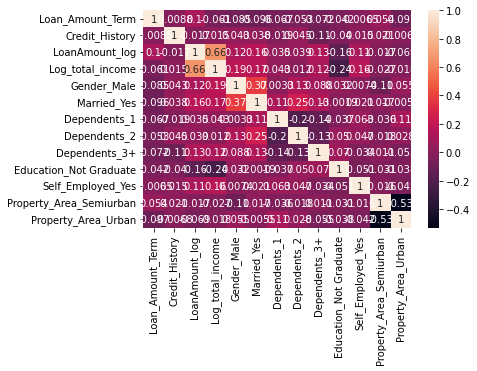

In [55]:
sns.heatmap(X.corr(),annot=True)

## Checking multicolinearity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VFI(X):
    vfi=pd.DataFrame()
    vfi["variables"]=X.columns
    vfi["vfi_score"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vfi
VFI(X)

,variables,vfi_score
0,Loan_Amount_Term,26.116674
1,Credit_History,7.249993
2,LoanAmount_log,183.946309
3,Log_total_income,204.284553
4,Gender_Male,6.774779
5,Married_Yes,3.916090
6,Dependents_1,1.394143
7,Dependents_2,1.436998
8,Dependents_3+,1.258897
9,Education_Not Graduate,1.272597


Log_total_income has higher vfi score and loanamount_log  So multicolinearity is more for these two variable we can remove these two variables 

In [71]:
X.drop(['Log_total_income','LoanAmount_log'],axis=1,inplace=True)

In [72]:
X.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

## Model 

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3,random_state=42)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score

In [75]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [76]:
pred_val=model.predict(x_valid)
acc=accuracy_score(pred_val,y_valid)
print('accuracy is {}'.format(acc))
print('Model F1-Score = ', f1_score(y_valid,pred_val))

accuracy is 0.8378378378378378
Model F1-Score =  0.8938053097345134


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid,pred_val)


array([[ 23,  23],
       [  1, 101]], dtype=int64)